In [3]:
import re 
import tweepy 
from tweepy import OAuthHandler 
from textblob import TextBlob 

#plot
import matplotlib.pyplot as plt

In [5]:
class TwitterClient(object):
    '''
    Twitter API client to access tweets for sentiment analysis
    '''

    def __init__(self):
        '''
        Twitter API client constructor 
        '''
        # keys and tokens from the Twitter Dev Console
        consumer_key = 'XXXXXXXXXX'
        consumer_secret = 'XXXXXXXXXX'
        access_token = 'XXXXXXXXXX'
        access_token_secret = 'XXXXXXXXXX'
        # attempt authentication 
        try:
			# create OAuthHandler object 
            self.auth = OAuthHandler(consumer_key, consumer_secret) 
			# set access token and secret 
            self.auth.set_access_token(access_token, access_token_secret) 
			# create tweepy API object to fetch tweets 
            self.api = tweepy.API(self.auth) 
        except: 
            print("Error: Authentication Failed")
    
    def clean_tweet(self, tweet): 
	    ''' 
		Utility function to clean tweet text by removing links, special characters 
		using simple regex statements. 
		'''
	    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split())

    
    def get_tweet_sentiment(self, tweet): 

        ''' 
        Utility function to classify sentiment of passed tweet 
        using textblob's sentiment method 
        '''
        
        #create TextBlob object of passed tweet text
        
        analysis = TextBlob(self.clean_tweet(tweet))
        
        # set sentiment 
        if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'
            

    def get_tweets(self, query, count = 10): 
        ''' 
		Main function to fetch tweets and parse them. 
        '''
		# empty list to store parsed tweets
        tweets = []
        try: 
            # call twitter api to fetch tweets 
            fetched_tweets = self.api.search(q = query, count = count) 	# parsing tweets one by one 
            for tweet in fetched_tweets: 
                # empty dictionary to store required params of a tweet 
                parsed_tweet = {} 		# saving text of tweet 
                parsed_tweet['text'] = tweet.text 
                # saving sentiment of tweet 
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text) 		# appending parsed tweet to tweets list 
                if tweet.retweet_count > 0: 
                    # if tweet has retweets, ensure that it is appended only once 
                    if parsed_tweet not in tweets: 
                        tweets.append(parsed_tweet) 
                else: 
                    tweets.append(parsed_tweet) 	
                # return parsed tweets 
            return tweets 
        except tweepy.TweepError as e: 
            # print error (if any) 
            print("Error : " + str(e)) 


In [48]:
def main(): 
	# creating object of TwitterClient Class 
	api = TwitterClient() 
	# calling function to get tweets 
	tweets = api.get_tweets(query = 'Ayodhya Verdict', count = 10000)	 
    # picking neutral tweets from tweets
	neutral_tweets = [tweet for tweet in tweets if tweet['sentiment'] == 'neutral'] 
    # picking positive tweets from tweets
	postive_tweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive'] 
    # picking negative tweets from tweets
	negative_tweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative'] 
	# percentage of neutral tweets 
	print("Neutral tweets percentage: {} % \ ".format(100*len(neutral_tweets)/len(tweets)))
	# percentage of positive tweets 
	print("Positive tweets percentage: {} %".format(100*len(postive_tweets)/len(tweets)))
	# percentage of negative tweets 
	print("Negative tweets percentage: {} %".format(100*len(negative_tweets)/len(tweets))) 
	# Data to plot
	labels = 'Neutral ', 'Postive', 'Negative'
	sizes = [len(neutral_tweets), len(postive_tweets), len(negative_tweets)]
	colors = ['yellowgreen', 'gold', 'lightcoral']
	explode = (0.1, 0, 0)  # explode 1st slice
	# Plot
	plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
	plt.axis('equal')
	plt.show()
	plt.savefig('tweets_dist.png')
	# printing first 5 positive tweets 
	print("\n\nPositive tweets:") 
	for tweet in postive_tweets[:10]: 
		print(tweet['text']) 	
	# printing first 5 negative tweets 
	print("\n\nNegative tweets:") 
	for tweet in negative_tweets[:10]: 
		print(tweet['text']) 

Neutral tweets percentage: 60.0 % \ 
Positive tweets percentage: 28.0 %
Negative tweets percentage: 12.0 %


Positive tweets:
RT @narendramodi: The Honourable Supreme Court has given its verdict on the Ayodhya issue. This verdict shouldn’t be seen as a win or loss…
RT @htTweets: #AyodhyaVerdict | Congress appeals for calm, says let’s abide by secular value

https://t.co/bEEfTtsKdb https://t.co/UQBuGRUs…
RT @republic: Ayodhya Verdict: SC thanks 3-member mediation panel for their efforts https://t.co/R7DMgZiKxa
Shiv Sena chief Uddhav Thackeray: Today's day will be written in golden letters in the history of India. Everyone h… https://t.co/UgmoWM3Au3
RT @sushantsareen: What is more satisfying than the #Ayodhya verdict is the intense heartburn and apoplectic reaction of The Wire and other…
RT @swotithot: Calling the SC a "Temple" is the only accurate part of his pronouncement. "Temple Of Justice Has Amicably Resolved Issue": P…
RT @mvmeet: Congress party before Ayodhya verdict: We won't le

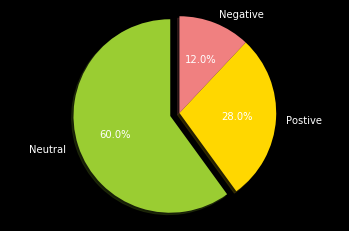

<Figure size 432x288 with 0 Axes>

In [49]:
if __name__ == "__main__": 
    # calling main function 
    main()